**Question 2** :- Implementing Floyd-Steinberg and Jarvis-Judice-Ninke dithering algorithms

In [2]:
# Question 2: Implementing Floyd-Steinberg and Jarvis-Judice-Ninke dithering algorithms
import numpy as np
from PIL import Image

def floyd_steinberg_dithering(image):
    img = image.convert('L')  # Convert to grayscale
    img = np.array(img)  # Convert to numpy array
    height, width = img.shape

    # Create a new array for the dithered image
    dithered_img = np.zeros((height, width), dtype=np.uint8)

    for y in range(height):
        for x in range(width):
            old_pixel = img[y, x]
            new_pixel = 255 * (old_pixel > 128)  # Threshold to either 0 or 255
            dithered_img[y, x] = new_pixel
            quant_error = old_pixel - new_pixel

            # Distribute the error
            if x + 1 < width:
                img[y, x + 1] += quant_error * 7 / 16
            if y + 1 < height:
                img[y + 1, x] += quant_error * 5 / 16
            if x - 1 >= 0 and y + 1 < height:
                img[y + 1, x - 1] += quant_error * 3 / 16
            if x + 1 < width and y + 1 < height:
                img[y + 1, x + 1] += quant_error * 1 / 16

    return Image.fromarray(dithered_img)

# Loading image
input_image = Image.open('tree.png')
dithered_image_floyd = floyd_steinberg_dithering(input_image)
dithered_image_floyd.show()


In [3]:
def jarvis_judice_ninke_dithering(image):
    img = image.convert('L')  # Convert to grayscale
    img = np.array(img)  # Convert to numpy array
    height, width = img.shape

    # Create a new array for the dithered image
    dithered_img = np.zeros((height, width), dtype=np.uint8)

    for y in range(height):
        for x in range(width):
            old_pixel = img[y, x]
            new_pixel = 255 * (old_pixel > 128)  # Threshold to either 0 or 255
            dithered_img[y, x] = new_pixel
            quant_error = old_pixel - new_pixel

            # Distribute the error
            if x + 1 < width:
                img[y, x + 1] += quant_error * 7 / 48
            if x + 2 < width:
                img[y, x + 2] += quant_error * 5 / 48
            if y + 1 < height:
                img[y + 1, x - 1] += quant_error * 3 / 48
            if y + 1 < height:
                img[y + 1, x] += quant_error * 5 / 48
            if y + 1 < height and x + 1 < width:
                img[y + 1, x + 1] += quant_error * 3 / 48
            if y + 1 < height and x + 2 < width:
                img[y + 1, x + 2] += quant_error * 1 / 48

    return Image.fromarray(dithered_img)

# Loading image
input_image = Image.open('tree.png')
dithered_image_jjn = jarvis_judice_ninke_dithering(input_image)
dithered_image_jjn.show()


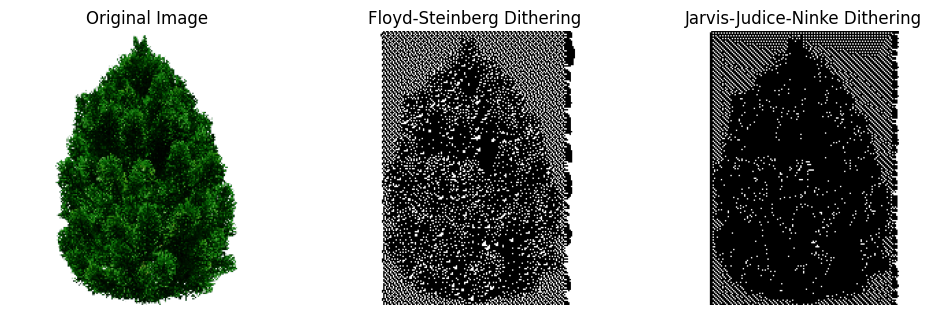

In [4]:
import matplotlib.pyplot as plt

input_image = Image.open('tree.png')

# Applying dithering
dithered_image_floyd = floyd_steinberg_dithering(input_image)
dithered_image_jjn = jarvis_judice_ninke_dithering(input_image)

# Displaying results
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(input_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Floyd-Steinberg Dithering')
plt.imshow(dithered_image_floyd, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Jarvis-Judice-Ninke Dithering')
plt.imshow(dithered_image_jjn, cmap='gray')
plt.axis('off')

plt.show()
